In [1]:
import numpy as np 
import pandas as pd
from pylab import plt,mpl

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

%matplotlib inline

## Regression


In [2]:
def f(x):
    return np.sin(x) + 0.5*x

def create_plot(x,y,styles,labels,axlabels):
    '''
        plot 2D line of two variales 
    '''
    plt.figure(figsize=(10,6))
    assert len(x) == len(y), 'x and y must be same size'
    for i in range(len(x)):
        plt.plot(x[i],y[i],styles[i],label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

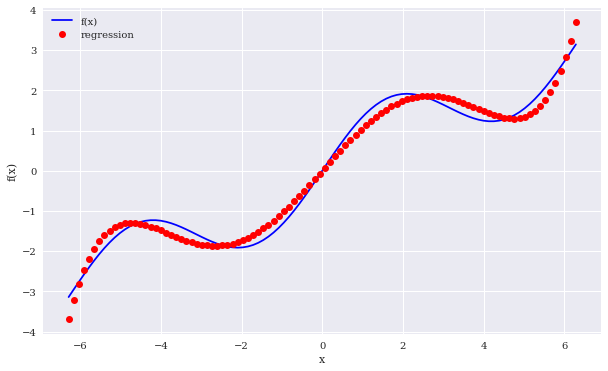

In [3]:
x= np.linspace(-2*np.pi,2*np.pi,100)
# create_plot([x],[f(x)],['b'],['f(x)'],['x','f(x)'])
res = np.polyfit(x,f(x),deg=5,full=True)
cy = np.polyval(res[0],x)
create_plot([x,x],[f(x),cy],['b','ro'],['f(x)','regression'],['x','f(x)'])

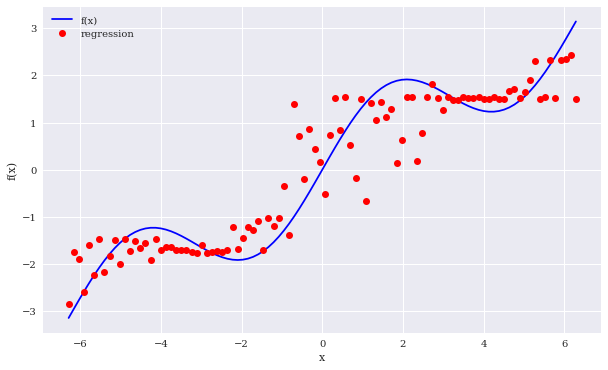

In [4]:
xn = np.linspace(-2*np.pi,2*np.pi,100)
xn += np.random.standard_normal(len(xn))
yn = f(x) + 0.25*np.random.standard_normal(len(xn))

reg = np.polyfit(xn,yn,7)
ry  = np.polyval(reg,xn)
create_plot([x,x],[f(x),ry],['b','ro'],['f(x)','regression'],['x','f(x)'])

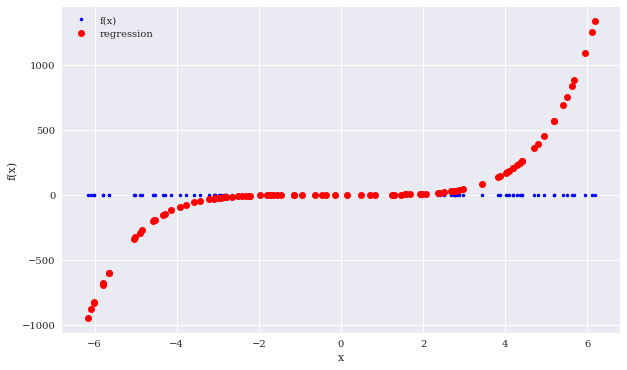

In [23]:
xu = np.random.rand(100)*4*np.pi -2*np.pi
yu = f(xu)
eg = np.polyfit(xu,yu,7)
ry  = np.polyval(reg,xu)
create_plot([xu,xu],[yu,ry],['b.','ro'],['f(x)','regression'],['x','f(x)'])

In [24]:
def fm(p):
    x,y = p
    return np.sin(x) + 0.25 * x + np.sin(y) + 0.05 * y**2
x,y = np.linspace(1,10,20),np.linspace(1,10,20)
X,Y = np.meshgrid(x,y)
Z=fm((X,y))
x=X.flatten()
y=Y.flatten()

In [25]:
# this is a dummy way of visulization 
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10,6))
# ax=fig.gca(projection='3d')
# surf = ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap='coolwarm',linewidth=0.5,antialiased=True)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('f(x,y)')
# fig.colorbar(surf,shrink=0.5,aspect=5)

In [26]:
mm = np.zeros((len(x),7))
mm[:,6] = np.sin(y)
mm[:,5] = np.sin(x)
mm[:,4] = x**2
mm[:,3] = y**2
mm[:,2] = x
mm[:,1] = y
mm[:,0] = 1
# print(mm)
reg = np.linalg.lstsq(mm,fm((x,y)),rcond=None)[0]
RZ  = np.dot(mm,reg).reshape((20,20))

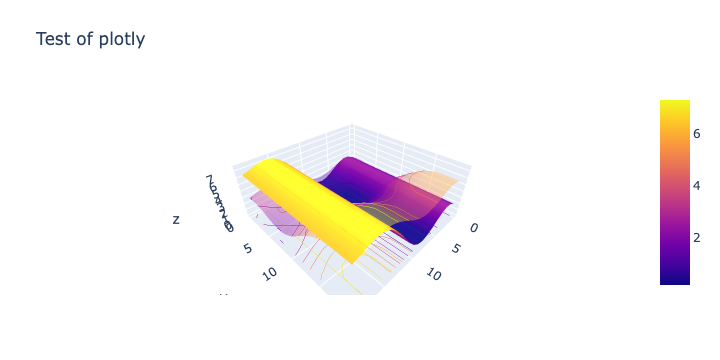

In [27]:
import plotly.graph_objects as go
Z2 = Z-np.random.rand()*5 
# Read data from a csv
# z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
fig = go.Figure(data=[go.Surface(z=Z),
                      go.Surface(z=RZ,showscale=False, opacity=0.4)
                     ])
fig.update_layout(title='Test of plotly', autosize=False,
                  width=400, height=300,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [10]:
# # This part will open a temporary deployment of Dash app at http://127.0.0.1:8050/ or localhost:8050/

# import dash
# import dash_core_components as dcc
# import dash_html_components as html

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [12]:
from scipy import stats
import numpy as np
x = np.random.random(10)
y = np.ones(len(x))*4
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [13]:
slope, intercept, r_value, p_value, std_err

(0.0, 4.0, 0.0, 1.0, 0.0)

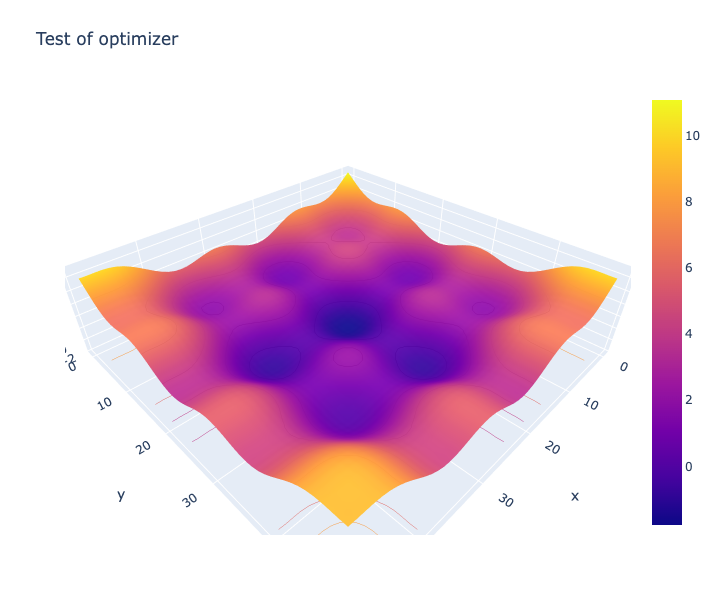

In [32]:
def fm2(p):
    x,y = p
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)
Z = fm2((X,Y))

fig = go.Figure(data=[go.Surface(z=Z),
                     ])
fig.update_layout(title='Test of optimizer', autosize=False,
                  width=600, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

In [35]:
import scipy.optimize as sco 
def fo(p):
    x,y = p 
    z = np.sin(x) + 0.05*x**2 +np.sin(y) + 0.05*y**2 
    if output:
        print('%8.4f| %8.4f| %8.4f'%(x,y,z))
    return z
output =True
sco.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish=None)

-10.0000| -10.0000|  11.0880
-10.0000|  -5.0000|   7.7529
-10.0000|   0.0000|   5.5440
-10.0000|   5.0000|   5.8351
-10.0000|  10.0000|  10.0000
 -5.0000| -10.0000|   7.7529
 -5.0000|  -5.0000|   4.4178
 -5.0000|   0.0000|   2.2089
 -5.0000|   5.0000|   2.5000
 -5.0000|  10.0000|   6.6649
  0.0000| -10.0000|   5.5440
  0.0000|  -5.0000|   2.2089
  0.0000|   0.0000|   0.0000
  0.0000|   5.0000|   0.2911
  0.0000|  10.0000|   4.4560
  5.0000| -10.0000|   5.8351
  5.0000|  -5.0000|   2.5000
  5.0000|   0.0000|   0.2911
  5.0000|   5.0000|   0.5822
  5.0000|  10.0000|   4.7471
 10.0000| -10.0000|  10.0000
 10.0000|  -5.0000|   6.6649
 10.0000|   0.0000|   4.4560
 10.0000|   5.0000|   4.7471
 10.0000|  10.0000|   8.9120


array([0., 0.])

In [ ]:
opt2 = sco.fmin(fo,opt)